# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

Training Error:
MSE: 9022.688606481042
MAE: 81.5748690449057

Testing Error:
MSE: 8885.213023931721
MAE: 80.13509486146036


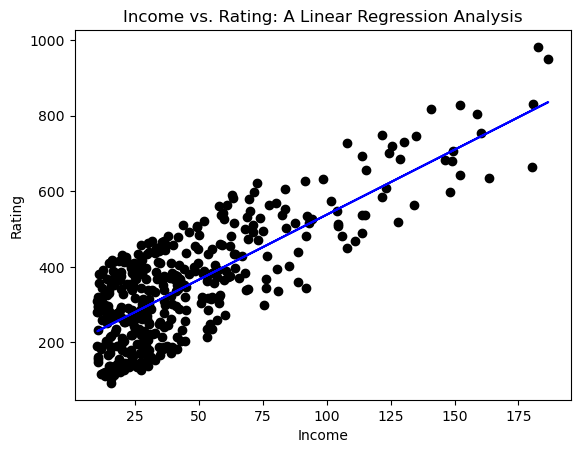

In [39]:
#Question 1 - I utilized the credit.csv that was part of Assignment #3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Define pathway to dataset + create data frame + clean the dataset by dropping NaNs
credit_df = 'Credit.csv'
credit = pd.read_csv(credit_df)
credit_cleaned = credit.dropna(subset=['Income', 'Rating'])

#Define the independent (features) and dependent (target) variables
x = credit_cleaned[['Income']].values
y = credit_cleaned['Rating'].values

#Create test/train split with 50% of the data going into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

#Insert column of ones to account for the intercept
x_train1 = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test1 = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

#Perform calculations to determine the inverse of the dot product + dot product of transposed training feature + training target set
left = np.linalg.inv(np.dot(x_train1.T, x_train1))
right = np.dot(x_train1.T, y_train)
b = np.dot(left, right)

#Calculate predictions for training and test sets
y_trainp1 = np.dot(x_train1, b)
y_testp1 = np.dot(x_test1, b)

#Calculate Mean Squared Error (MSE) + Mean Absolute Error (MAE) for the training and test sets
training_mse = mean_squared_error(y_train, y_trainp1)
training_mae = mean_absolute_error(y_train, y_trainp1)
testing_mse = mean_squared_error(y_test, y_testp1)
testing_mae = mean_absolute_error(y_test, y_testp1)

#Print MSE and MAE for training set
print("Training Error:")
print("MSE:", training_mse)
print("MAE:", training_mae)

#Print MSE and MAE for testing set
print("\nTesting Error:")
print("MSE:", testing_mse)
print("MAE:", testing_mae)

#Visualize the actual data + regression
plt.scatter(x, y, color='black')
plt.plot(x, np.dot(np.hstack((np.ones((x.shape[0], 1)), x)), b), color='blue')
plt.xlabel('Income')
plt.ylabel('Rating')
plt.title('Income vs. Rating: A Linear Regression Analysis')
plt.show()

In [40]:
#Question 2 - I utilized the "star classification" dataset found on Kaggle - https://www.kaggle.com/datasets/brsdincer/star-type-classification
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Define pathway to star_classification dataset + create dataframe + clean/tidy by dropping NaNs
stellar_df = 'star_classification.csv'
stellar = pd.read_csv(stellar_df)
stellar_cleaned = stellar.dropna(subset=['u', 'g', 'r', 'i', 'z', 'class'])

#Define independent variables (features) to analyze in relation to the dependent variable (target) + convert "class" category to numerical values to simplify analysis
features = ['u', 'g', 'r', 'i', 'z']
x = stellar_cleaned[features]
y = stellar_cleaned['class'].astype('category').cat.codes

#Create test/train split with 50% of the data going into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

#Utilize DecisionTreeClassifier for model1 + train the model on x_train and y_train
model1 = DecisionTreeClassifier(criterion='entropy')
model1.fit(x_train, y_train)

#Compute predictions on x_train and x_test by training model1
predictions_train = model1.predict(x_train)
predictions_test = model1.predict(x_test)

#Training data - perform calculations to determine Accuracy + Confusion Matrix + Classification Report
accuracy_train = accuracy_score(y_train, predictions_train)
conf_matrix_train = confusion_matrix(y_train, predictions_train)
report_train = classification_report(y_train, predictions_train)

#Testing data - perform calculations to determine Accuracy + Confusion Matrix + Classification Report
accuracy_test = accuracy_score(y_test, predictions_test)
conf_matrix_test = confusion_matrix(y_test, predictions_test)
report_test = classification_report(y_test, predictions_test)

#Training data - print requested metrics
print("Training Data:")
print("Accuracy:", accuracy_train)
print("\nConfusion Matrix:\n", conf_matrix_train)
print("\nClassification Report:\n", report_train)

#Testing data - print requested metrics
print("Test Data:")
print("Accuracy:", accuracy_test)
print("\nConfusion Matrix:\n", conf_matrix_test)
print("\nClassification Report:\n", report_test)

#Perform cross-validation to understand how the model is performing
cv_results = cross_validate(model1, x, y, cv=10,
                            scoring=['accuracy', 'recall_macro', 'precision_macro', 'f1_macro'],
                            return_train_score=True)

#Print cross-validation results
print(cv_results)

Training Data:
Accuracy: 1.0

Confusion Matrix:
 [[29735     0     0]
 [    0  9402     0]
 [    0     0 10863]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29735
           1       1.00      1.00      1.00      9402
           2       1.00      1.00      1.00     10863

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

Test Data:
Accuracy: 0.81372

Confusion Matrix:
 [[26199  1454  2057]
 [ 1433  6875  1251]
 [ 1922  1197  7612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     29710
           1       0.72      0.72      0.72      9559
           2       0.70      0.71      0.70     10731

    accuracy                           0.81     50000
   macro avg       0.77      0.77      0.77     50000
weighted avg     

In [41]:
#Question 3 - I utilized the "star classification" dataset found on Kaggle - https://www.kaggle.com/datasets/brsdincer/star-type-classification
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Define pathway to star_classification dataset + create dataframe + clean/tidy by dropping NaNs
stellar_df = 'star_classification.csv'
stellar = pd.read_csv(stellar_df)
stellar_cleaned = stellar.dropna(subset=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class'])

#Define independent variables (additional features for this particular model: 'Alpha', 'Delta', 'Redshift') to analyze in relation to the dependent variable (target) + convert "class" category to numerical values to simplify analysis
features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
x = stellar_cleaned[features]
y = stellar_cleaned['class'].astype('category').cat.codes

#Create test/train split with 50% of the data going into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

#Utilize DecisionTreeClassifier for model2 + train the model on x_train and y_train
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(x_train, y_train)

#Compute predictions on x_train and x_test by training model2
train_pred2 = model2.predict(x_train)
test_pred2 = model2.predict(x_test)

#Training data - perform calculations to determine Accuracy + Confusion Matrix + Classification Report
accuracy_train = accuracy_score(y_train, train_pred2)
conf_matrix_train = confusion_matrix(y_train, train_pred2)
report_train = classification_report(y_train, train_pred2)

#Testing data - perform calculations to determine Accuracy + Confusion Matrix + Classification Report
accuracy_test = accuracy_score(y_test, test_pred2)
conf_matrix_test = confusion_matrix(y_test, test_pred2)
report_test = classification_report(y_test, test_pred2)

#Training data - print requested metrics
print("Training Data:")
print("Accuracy:", accuracy_train)
print("\nConfusion Matrix:\n", conf_matrix_train)
print("\nClassification Report:\n", report_train)

#Testing data - print requested metrics
print("Test Data:")
print("Accuracy:", accuracy_test)
print("\nConfusion Matrix:\n", conf_matrix_test)
print("\nClassification Report:\n", report_test)

#Perform cross-validation to understand how the model is performing
cv_results = cross_validate(model2, x, y, cv=10,
                            scoring=['accuracy', 'recall_macro', 'precision_macro', 'f1_macro'],
                            return_train_score=True)

#Print cross-validation results
print(cv_results)

Training Data:
Accuracy: 1.0

Confusion Matrix:
 [[29692     0     0]
 [    0  9537     0]
 [    0     0 10771]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29692
           1       1.00      1.00      1.00      9537
           2       1.00      1.00      1.00     10771

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

Test Data:
Accuracy: 0.9653

Confusion Matrix:
 [[28902   809    42]
 [  839  8584     1]
 [   43     1 10779]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     29753
           1       0.91      0.91      0.91      9424
           2       1.00      1.00      1.00     10823

    accuracy                           0.97     50000
   macro avg       0.96      0.96      0.96     50000
weighted avg      